# Employee Turnover
## Libraray used: Scikit-Learn, Pandas, Numpy, Matplotlib, Seaborn
## Models used: Logistic Regression, Random Forest, and Support Vector Machine.
### Also measure the accuracy of models



### Data Preprocessing

In [1]:
import pandas as pd
df=pd.read_csv('turnover.csv')
col_nm=df.columns.tolist()
print("Column Names: ", col_nm)

print("\n Sample data: ")
df.head()



Column Names:  ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

 Sample data: 


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [2]:
# Renaming certain columns for better readability
df = df.rename(columns={'satisfaction_level': 'satisfaction', 
                        'last_evaluation': 'evaluation',
                        'number_project': 'projectCount',
                        'average_montly_hours': 'averageMonthlyHours',
                        'time_spend_company': 'yearsAtCompany',
                        'Work_accident': 'workAccident',
                        'promotion_last_5years': 'promotion',
                        'sales' : 'department',
                        'left' : 'turnover'
                        })

In [3]:
# Move the reponse variable "turnover" to the front of the table
front = df['turnover']

# drop(colume name list , axis: 0  for index 1 for columns, inplace means permanent change)
df.drop(labels=['turnover'], axis=1,inplace = True)

# insert( insert column location, column to be inserted , values)
df.insert(0, 'turnover', front)

df.head()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion,department,salary
0,1,0.38,0.53,2,157,3,0,0,sales,low
1,1,0.80,0.86,5,262,6,0,0,sales,medium
2,1,0.11,0.88,7,272,4,0,0,sales,medium
3,1,0.72,0.87,5,223,5,0,0,sales,low
4,1,0.37,0.52,2,159,3,0,0,sales,low


In [4]:
df.dtypes

turnover                 int64
satisfaction           float64
evaluation             float64
projectCount             int64
averageMonthlyHours      int64
yearsAtCompany           int64
workAccident             int64
promotion                int64
department              object
salary                  object
dtype: object

Our data is pretty clean, no missing values

In [5]:
df.isnull().any()

turnover               False
satisfaction           False
evaluation             False
projectCount           False
averageMonthlyHours    False
yearsAtCompany         False
workAccident           False
promotion              False
department             False
salary                 False
dtype: bool

In [6]:
df.shape

(14999, 10)

### Data Exploration

In [7]:
# Counting people who left
df['turnover'].value_counts()

0    11428
1     3571
Name: turnover, dtype: int64

In [8]:
turnover_rate = df.turnover.value_counts() / 14999
turnover_rate

0    0.761917
1    0.238083
Name: turnover, dtype: float64

In [9]:
df.groupby('turnover').mean()

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


Observations:
1. Average satisfaction level of person who stayed with the company is higher than those who left
2. Average monthly hours of people who left is more than those who stayed
3. Employees who had workplace accidents are less likely to leave than that of the employee who did not have workplace accidents.
4. Promoted in last 5 years employess more likely to stay


In [10]:
df.describe()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.238083,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268
std,0.425924,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281
min,0.000000,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000
25%,0.000000,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000
50%,0.000000,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000
75%,0.000000,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000


In [11]:
df.groupby('department').mean()

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
department,,,,,,,,
IT,0.222494,0.618142,0.716830,3.816626,202.215974,3.468623,0.133659,0.002445
RandD,0.153748,0.619822,0.712122,3.853875,200.800508,3.367217,0.170267,0.034307
accounting,0.265971,0.582151,0.717718,3.825293,201.162973,3.522816,0.125163,0.018253
hr,0.290934,0.598809,0.708850,3.654939,198.684709,3.355886,0.120433,0.020298
management,0.144444,0.621349,0.724000,3.860317,201.249206,4.303175,0.163492,0.109524
marketing,0.236597,0.618601,0.715886,3.687646,199.385781,3.569930,0.160839,0.050117
product_mng,0.219512,0.619634,0.714756,3.807095,199.965632,3.475610,0.146341,0.000000
sales,0.244928,0.614447,0.709717,3.776329,200.911353,3.534058,0.141787,0.024155
support,0.248991,0.618300,0.723109,3.803948,200.758188,3.393001,0.154778,0.008973


### Data Visualization
Bar chart for department of employee and the frequency of turnover

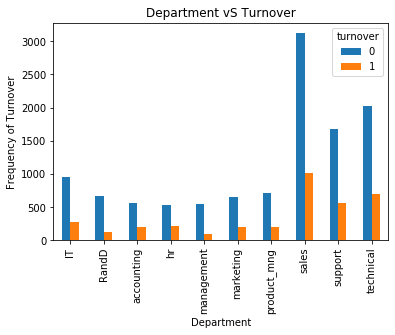

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt
pd.crosstab(df.department,df.turnover).plot(kind='bar')
plt.title('Department vS Turnover')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('department_bar_chart')

Summary:

The sales, technical, and support department were the top 3 departments to have employee turnover.

The management department had the smallest amount of turnover


Bar chart for employee salary level and the frequency of turnover

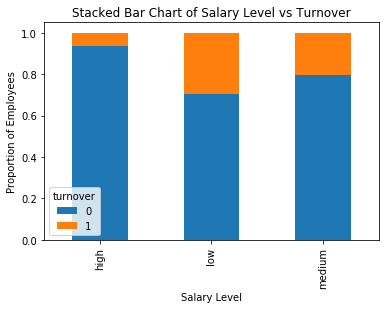

In [13]:
table=pd.crosstab(df.salary, df.turnover)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Salary Level vs Turnover')
plt.xlabel('Salary Level')
plt.ylabel('Proportion of Employees')
plt.savefig('salary_bar_chart')

Summary:

Majority of employees who left either had low or medium salary.

Barely any employees left with high salary

Employees with low to average salaries tend to leave the company.

,turnover,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,promotion
turnover,1.000000,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,-0.061788
satisfaction,-0.388375,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,0.025605
evaluation,0.006567,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,-0.008684
projectCount,0.023787,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,-0.006064
averageMonthlyHours,0.071287,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,-0.003544
yearsAtCompany,0.144822,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.067433
workAccident,-0.154622,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,0.039245
promotion,-0.061788,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,1.000000


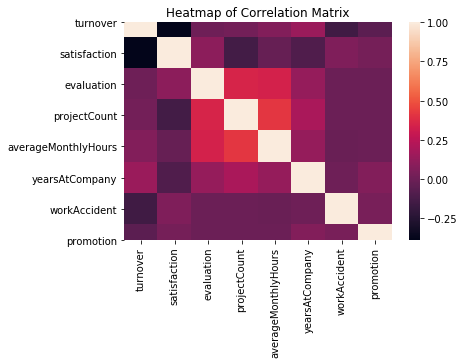

In [14]:
import seaborn as sns
#Correlation Matrix
corr = df.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title('Heatmap of Correlation Matrix')
corr

Moderate Positively Correlated Features:

projectCount vs evaluation: 0.349333
projectCount vs averageMonthlyHours: 0.417211
averageMonthlyHours vs evaluation: 0.339742

Moderate Negatively Correlated Feature:

satisfaction vs turnover: -0.388375

Summary:

From the heatmap, there is a positive(+) correlation between projectCount, averageMonthlyHours, and evaluation. Which could mean that the employees who spent more hours and did more projects were evaluated highly.

For the negative(-) relationships, turnover and satisfaction are highly correlated. I'm assuming that people tend to leave a company more when they are less satisfied.

[Text(0, 0.5, 'Percent')]

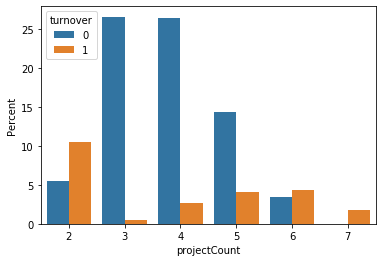

In [15]:
ax = sns.barplot(x="projectCount", y="projectCount", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")



Summary:

More than half of the employees with 2,6, and 7 projects left the company

Majority of the employees who did not leave the company had 3,4, and 5 projects

All of the employees with 7 projects left the company

There is an increase in employee turnover rate as project count increases

Text(0.5, 1.0, 'Employee Evaluation Distribution - Turnover V.S. No Turnover')

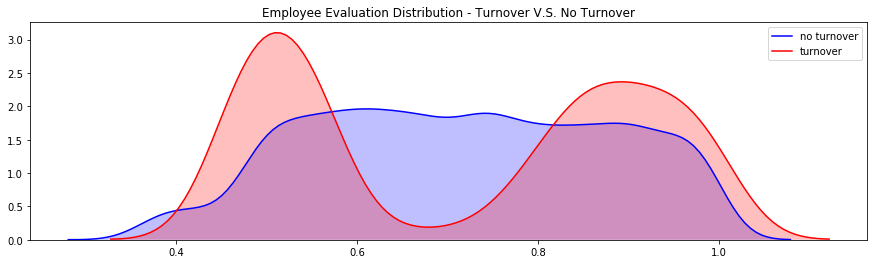

In [16]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,4),)
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'evaluation'] , color='b',shade=True,label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'evaluation'] , color='r',shade=True, label='turnover')
plt.title('Employee Evaluation Distribution - Turnover V.S. No Turnover')

Summary:

There is a biomodal distribution for those left.

Employees with low performance/evaluation tend to leave the company more

Employees with high performance/evaluation tend to leave the company more

The safe spot for employees that stayed is within 0.6-0.8 evaluation

Text(0.5, 1.0, 'Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')

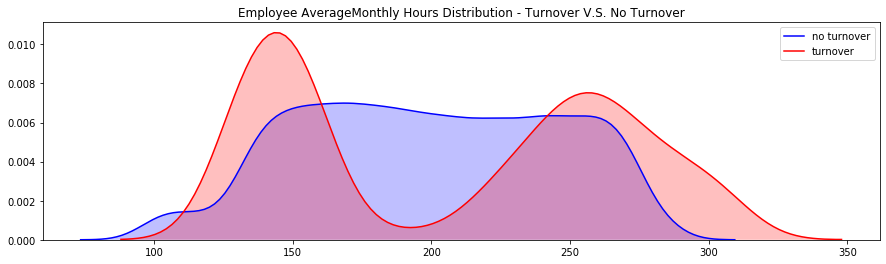

In [17]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] , color='r',shade=True, label='turnover')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')


Summary:

Another bi-modal distribution for employees that turnovered

Employees who had ~150hours or less hours of work left the company more

Employees who had ~250 or more hours of work left the company

Employees who left generally were underworked or overworked.

Text(0.5, 1.0, 'Employee Satisfaction Distribution - Turnover V.S. No Turnover')

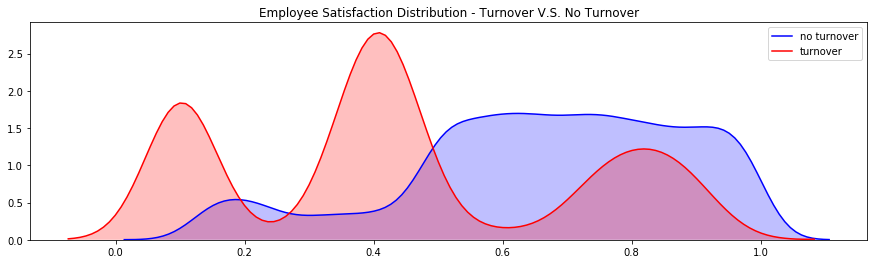

In [18]:
#KDEPlot: Kernel Density Estimate Plot
fig = plt.figure(figsize=(15,4))
ax=sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] , color='b',shade=True, label='no turnover')
ax=sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] , color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')


Summary:

There is a tri-modal distribution for employees that turnovered

Employees who had really low satisfaction levels (0.2 or less) left the company more

Employees who had low satisfaction levels (0.3~0.5) left the company more

Employees who had really high satisfaction levels (0.7 or more) left the company more


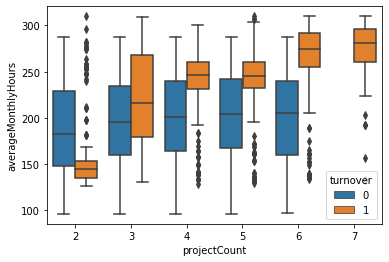

In [19]:
#ProjectCount VS AverageMonthlyHours [BOXPLOT]

import seaborn as sns
sns.boxplot(x="projectCount", y="averageMonthlyHours", hue="turnover", data=df)


Summary:

As project count increased, so did average monthly hours

Something weird about the boxplot graph is the difference in averageMonthlyHours between people who had a turnver and did not.

Looks like the average employees who stayed worked about 200hours/month. Those that had a turnover worked about 250hours/month


Looks like employees who did not have a turnover had consistent averageMonthlyHours, despite the increase in projects

In contrast, employees who did have a turnover had an increase in averageMonthlyHours with the increase in projects

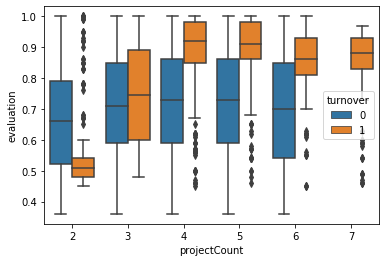

In [20]:
#ProjectCount VS Evaluation
import seaborn as sns
sns.boxplot(x="projectCount", y="evaluation", hue="turnover", data=df)

Summary:

Looks like employees who did not leave the company had an average evaluation of around 70% even with different projectCounts

There is a huge skew in employees who had a turnover though. It drastically changes after 3 projectCounts. 

Employees that had two projects and a horrible evaluation left. 

Employees with more than 3 projects and super high evaluations left


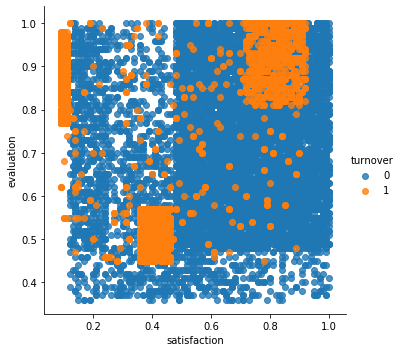

In [21]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
           fit_reg=False, # No regression line
           hue='turnover')   # Color by evolution stage

Summary:

Observing from the above graph, there can be 3 types of clusters for employees who left

1. Hard-working and sad / Overworked Employee:

Satisfaction: 0 - 0.2       Evaluation: 0.75 - 1.0 

Good Worker but felt horrible at job
    
2. Bad and sad / underperformed Employee:

Satisfaction: 0.35 - 0.45    Evaluation: 0.43 - 0.58  
    
Badly evaluated worker may felt bad at work

3. Hard-working and Happy / Outstanding Employee:

Satisfaction: 0.7 - 1.0      Evaluation: 0.8 - 1.0  
    
Ideal worker, found another job opportunity 

[Text(0, 0.5, 'Percent')]

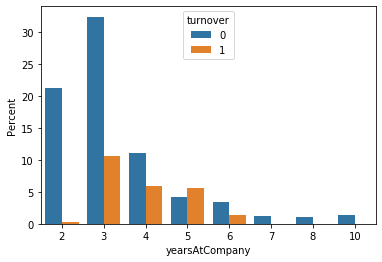

In [22]:
ax = sns.barplot(x="yearsAtCompany", y="yearsAtCompany", hue="turnover", data=df, estimator=lambda x: len(x) / len(df) * 100)
ax.set(ylabel="Percent")

Summary:

Employees most likely to stay after 6 years or under 2 year in company

Employees most likely to leave between 3-5 year range in company

More than half of the employees with 4 and 5 years left the company

Employees with 5 years should highly be looked into

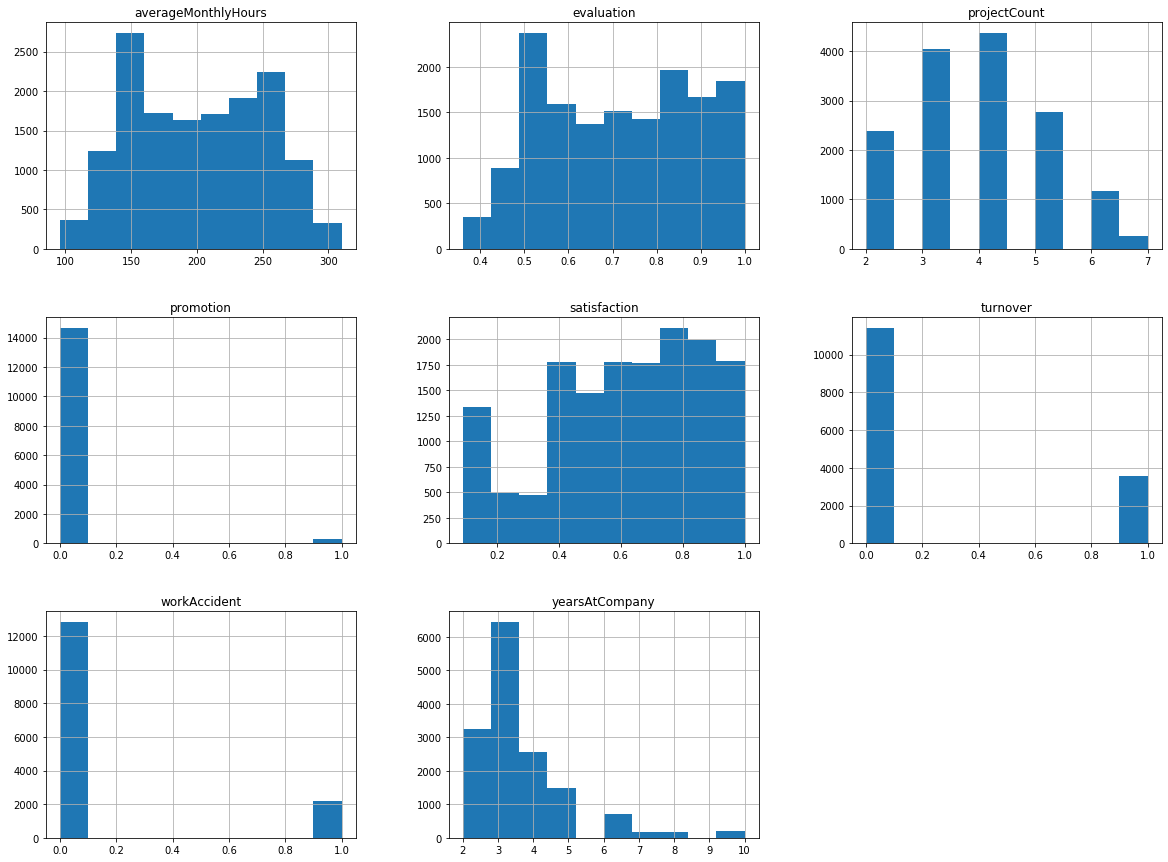

In [23]:
num_bins = 10
df.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

Text(0, 0.5, 'Employee Count')

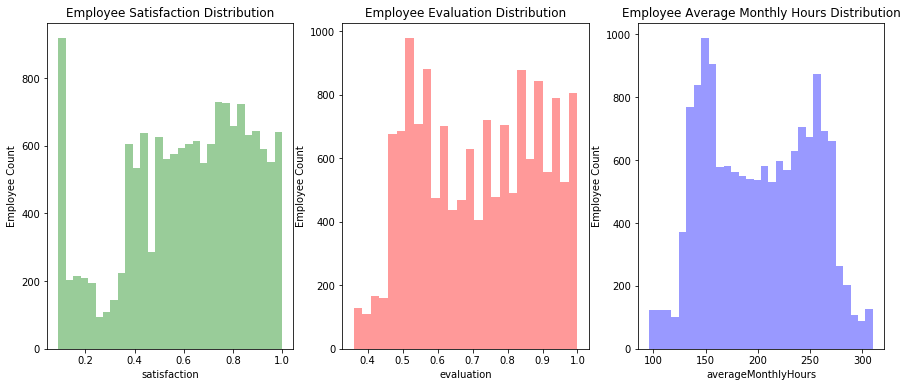

In [24]:
f, axes = plt.subplots(ncols=3, figsize=(15, 6))

# Graph Employee Satisfaction
sns.distplot(df.satisfaction, kde=False, color="g", ax=axes[0]).set_title('Employee Satisfaction Distribution')
axes[0].set_ylabel('Employee Count')

# Graph Employee Evaluation
sns.distplot(df.evaluation, kde=False, color="r", ax=axes[1]).set_title('Employee Evaluation Distribution')
axes[1].set_ylabel('Employee Count')

# Graph Employee Average Monthly Hours
sns.distplot(df.averageMonthlyHours, kde=False, color="b", ax=axes[2]).set_title('Employee Average Monthly Hours Distribution')
axes[2].set_ylabel('Employee Count')

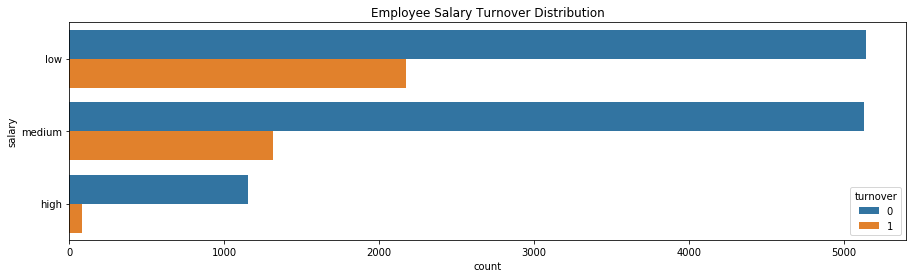

In [25]:
#count plot for salry vs turnover

f, ax = plt.subplots(figsize=(15, 4))
sns.countplot(y="salary", hue='turnover', data=df).set_title('Employee Salary Turnover Distribution');